In [1]:
from numpy import array,zeros,mean,std
def readcsv(f):
    with open(f) as file:
        data=[]
        j=0
        for i in file:
            i=i.replace('\n','')
            i=i.replace(',','|')
            data.append(i)
            j+=1
        data=list(array(data).reshape((j)))
        data[0]=list(array(data[0].split('|')))
        for i in range(1,len(data)):
            data[i]=data[i].split('|')
            for j in range(1,len(data[0])):
                data[i][j]=float(data[i][j])
    return data

it=readcsv('indoor-temperature-last-year.csv')
ot=readcsv('outside-temperature-last-year.csv')
bm=readcsv('barometer-last-year.csv')
rf=readcsv('rainfall-last-year.csv')

In [2]:
from pandas import DataFrame as DF
def statistics(f):
    g=readcsv(f)
    d=DF(g)
    x=list(d.iloc[0])
    d=d.set_index(d[0])
    d.columns=x
    d=d.drop(x[0],axis=1).drop(x[0],axis=0)
    return d

it_d=statistics('indoor-temperature-last-year.csv')
ot_d=statistics('outside-temperature-last-year.csv')
bm_d=statistics('barometer-last-year.csv')
rf_d=statistics('rainfall-last-year.csv')

In [3]:
print('Statistics for indoor-temperature-last-year:----------------------')
max_it_d=it_d.max()
min_it_d=it_d.min()
mean_it_d=it_d.mean()
sd_it_d=it_d.std()
print('max:\n',max_it_d)
print()
print('min:\n',min_it_d)
print()
print('mean:\n',mean_it_d)
print()
print('sd:\n',sd_it_d)
print()

print('Statistics for outside-temperature-last-year:---------------------')
max_ot_d=ot_d.max()
min_ot_d=ot_d.min()
mean_ot_d=ot_d.mean()
sd_ot_d=ot_d.std()
print('max:\n',max_ot_d)
print()
print('min:\n',min_ot_d)
print()
print('mean:\n',mean_ot_d)
print()
print('sd:\n',sd_ot_d)
print()

print('Statistics for barometer-last-year:-------------------------------')
max_bm_d=bm_d.max()
min_bm_d=bm_d.min()
mean_bm_d=bm_d.mean()
sd_bm_d=bm_d.std()
print('max:\n',max_bm_d)
print()
print('min:\n',min_bm_d)
print()
print('mean:\n',mean_bm_d)
print()
print('sd:\n',sd_bm_d)
print()

print('Statistics for rainfall-last-year:--------------------------------')
max_rf_d=rf_d.max()
min_rf_d=rf_d.min()
mean_rf_d=rf_d.mean()
sd_rf_d=rf_d.std()
print('max:\n',max_rf_d)
print()
print('min:\n',min_rf_d)
print()
print('mean:\n',mean_rf_d)
print()
print('sd:\n',sd_rf_d)
print()

Statistics for indoor-temperature-last-year:----------------------
max:
 Humidity                     59.0
Temperature                 29.21
Temperature_range (low)      28.2
Temperature_range (high)     31.1
dtype: object

min:
 Humidity                     37.0
Temperature                 18.04
Temperature_range (low)      14.9
Temperature_range (high)     19.7
dtype: object

mean:
 Humidity                    48.519774
Temperature                 21.827885
Temperature_range (low)     20.555932
Temperature_range (high)    23.533616
dtype: float64

sd:
 Humidity                    5.188886
Temperature                 2.058307
Temperature_range (low)     2.405125
Temperature_range (high)    1.701466
dtype: float64

Statistics for outside-temperature-last-year:---------------------
max:
 Temperature                 26.38
Temperature_range (low)      18.7
Temperature_range (high)     38.5
dtype: object

min:
 Temperature                -1.81
Temperature_range (low)     -4.1
Temperature_r

In [4]:
from pandas import concat as cc
D=cc([it_d,ot_d,bm_d,rf_d],axis=1)
D.columns=['Humidity','Indoor_Temp.','Indoor_Temp.(Low)','Indoor_Temp.(High)','Outdoor_Temp.','Outdoor_Temp.(Low)','Outdoor_Temp.(High)','Baro','Rainfall (mm)']

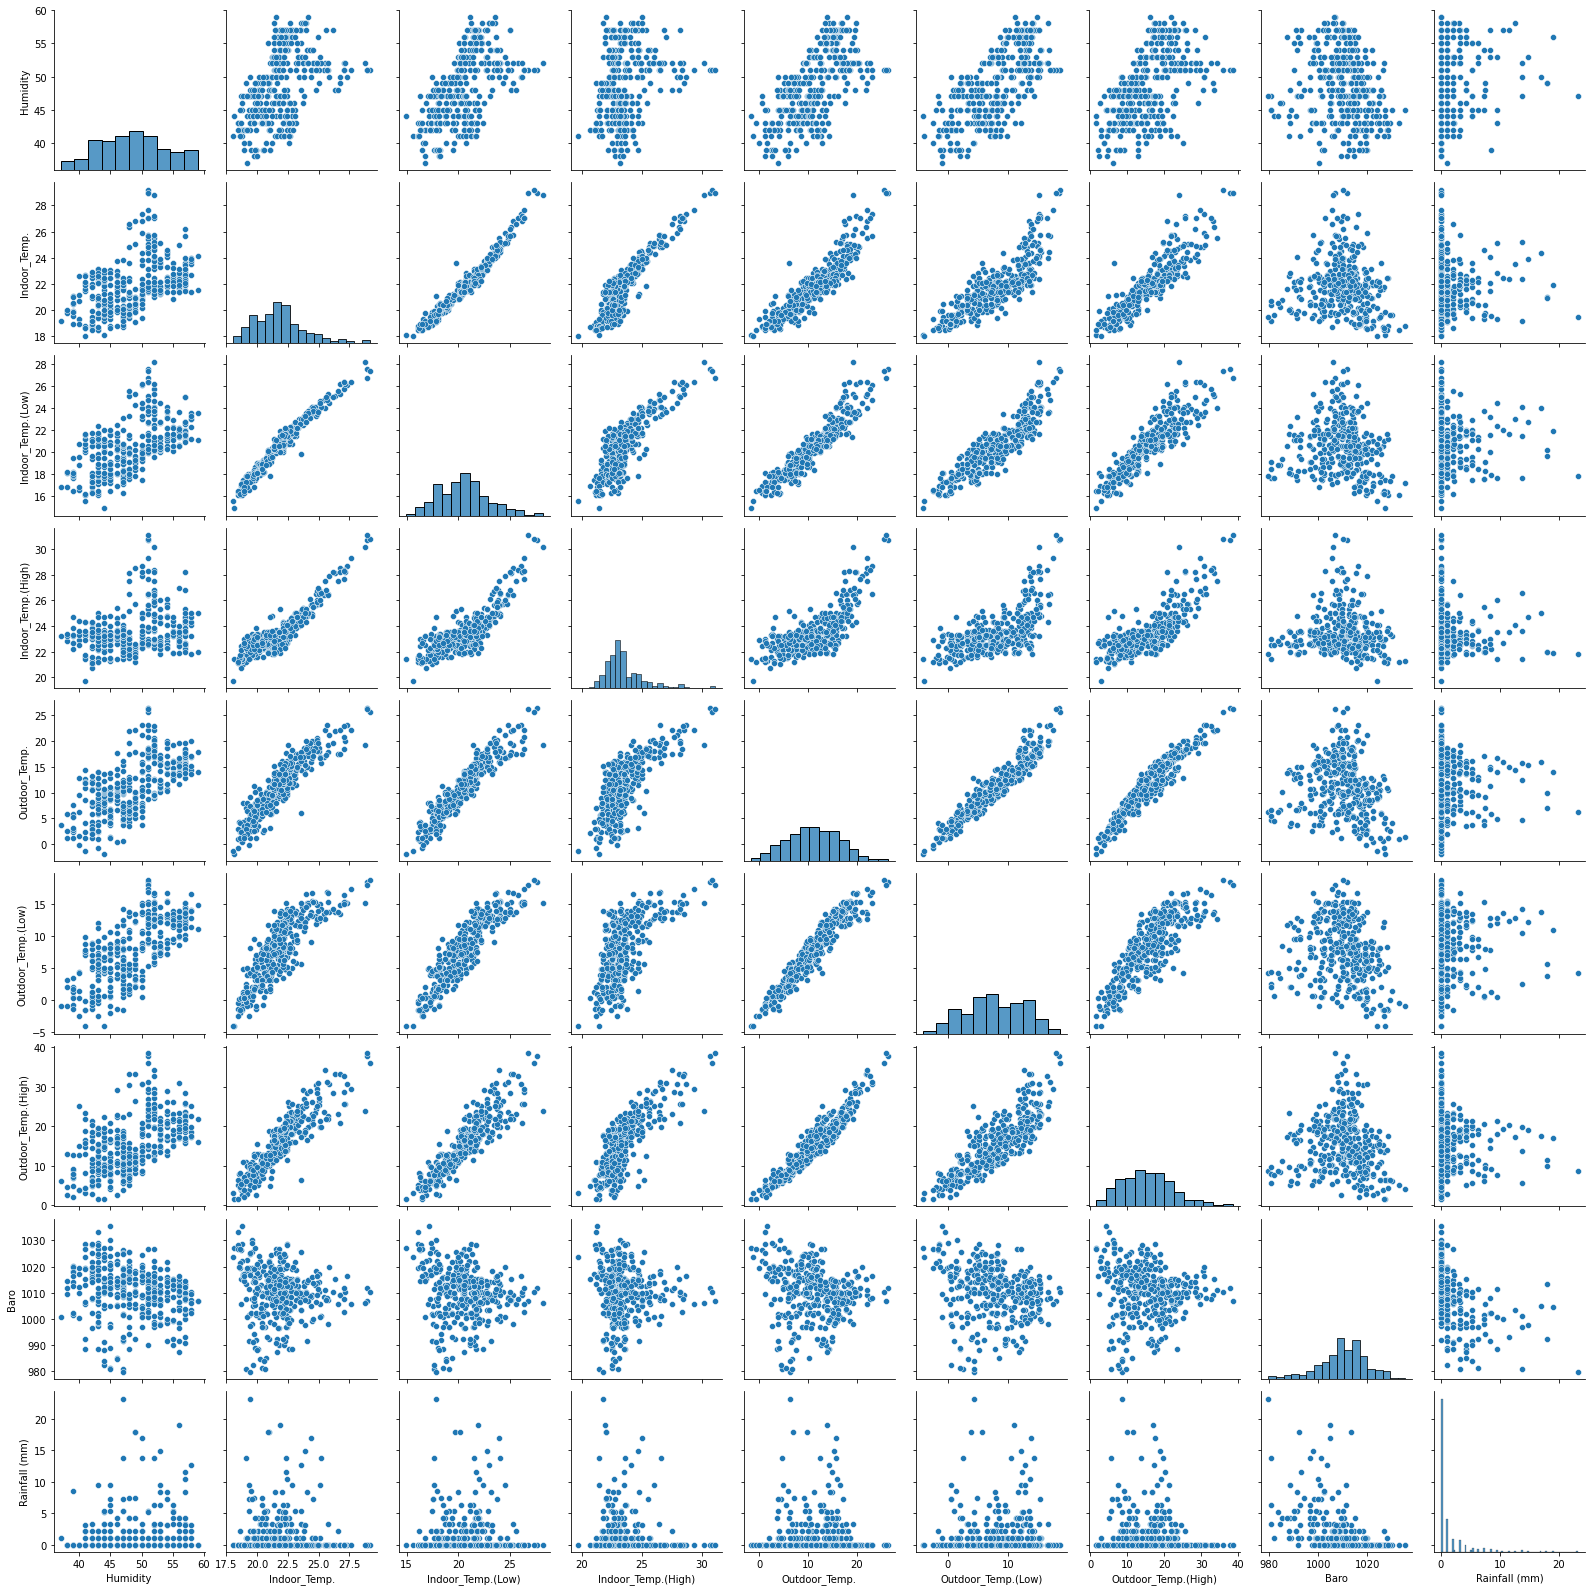

In [5]:
import seaborn as sb
Ds=sb.pairplot(D)
Ds

# positive correlation between (mean,high,low) indoor and outdoor temperatures, and almost positive correlation between temperatures and humidity.

In [6]:
# detect missing feature data
D.loc[D.isnull().any(axis=1)]

,Humidity,Indoor_Temp.,Indoor_Temp.(Low),Indoor_Temp.(High),Outdoor_Temp.,Outdoor_Temp.(Low),Outdoor_Temp.(High),Baro,Rainfall (mm)
0,,,,,,,,,
2016/12/22 0:00,47.0,19.56,17.6,21.7,4.84,1.7,7.9,1019.6,NaN
2017/5/17 0:00,48.0,22.2,21.6,23.0,12.67,9.7,14.5,1009.5,NaN
2017/7/22 0:00,NaN,NaN,NaN,NaN,14.36,10.6,18.5,999.4,1.0


In [7]:
# detect missing date
import pandas as pd
from datetime import datetime as dt
def fulllist(startdate, enddate):
    fulldate=[dt.strftime(_,'%Y/%m/%d 0:00') for _ in list(pd.date_range(start=startdate, end=enddate))]
    return fulldate

import datetime
fulldate=fulllist('2016/10/9 0:00','2017/10/9 0:00')
origdate=D._stat_axis.values.tolist()
for i in range(len(fulldate)):
    fulldate[i]=fulldate[i].replace('/0','/')
missdate=[]
for i in fulldate:
    if i not in origdate:
        missdate.append(i)
missdate

['2016/12/17 0:00',
 '2017/3/26 0:00',
 '2017/8/3 0:00',
 '2017/8/4 0:00',
 '2017/8/5 0:00',
 '2017/8/6 0:00',
 '2017/8/7 0:00',
 '2017/8/8 0:00',
 '2017/8/9 0:00',
 '2017/8/10 0:00',
 '2017/8/11 0:00']

In [8]:
# complete date list
import numpy as np
Dii=[]
for i in range(len(missdate)):
    Dii.append([missdate[i],np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN])
Dii=DF(Dii)
Dii=Dii.set_index(Dii[0]).drop(Dii.columns[0],axis=1)
Dii.columns=['Humidity','Indoor_Temp.','Indoor_Temp.(Low)','Indoor_Temp.(High)','Outdoor_Temp.','Outdoor_Temp.(Low)','Outdoor_Temp.(High)','Baro','Rainfall (mm)']
D=cc([D,Dii],axis=0)
D

,Humidity,Indoor_Temp.,Indoor_Temp.(Low),Indoor_Temp.(High),Outdoor_Temp.,Outdoor_Temp.(Low),Outdoor_Temp.(High),Baro,Rainfall (mm)
0,,,,,,,,,
2016/10/9 0:00,54.0,21.93,21.0,22.8,10.66,7.2,13.8,1021.9,0.0
2016/10/10 0:00,52.0,21.77,20.4,23.6,8.94,5.6,12.8,1019.9,0.0
2016/10/11 0:00,51.0,21.36,19.9,23.0,8.69,5.3,14.3,1015.8,0.0
2016/10/12 0:00,51.0,21.44,20.0,23.6,11.55,9.0,14.9,1013.2,0.0
2016/10/13 0:00,52.0,21.22,20.1,22.3,9.4,6.0,13.3,1005.9,0.0
...,...,...,...,...,...,...,...,...,...
2017/8/7 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017/8/8 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017/8/9 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
M_01=D[83:114]
M_02=D[114:142]
M_03=cc([D[142:172],D[356:357]],axis=0)
M_04=D[172:202]
M_05=D[202:233]
M_06=D[233:263]
M_07=cc([D[263:293],D[354:355]],axis=0)
M_08=cc([D[293:315],D[357:367]],axis=0)
M_09=D[315:345]
M_10=cc([D[0:23],D[345:354]],axis=0)
M_11=D[23:53]
M_12=cc([D[53:83],D[355:356]],axis=0)

S1=cc([M_01,M_02,M_03],axis=0)
S2=cc([M_04,M_05,M_06],axis=0)
S3=cc([M_07,M_08,M_09],axis=0)
S4=cc([M_10,M_11,M_12],axis=0)

In [10]:
print('Monthly statistics in last year:----------------------')
max_M=[M_01.max(),M_02.max(),M_03.max(),M_04.max(),M_05.max(),M_06.max(),M_07.max(),M_08.max(),M_09.max(),M_10.max(),M_11.max(),M_12.max()]
min_M=[M_01.min(),M_02.min(),M_03.min(),M_04.min(),M_05.min(),M_06.min(),M_07.min(),M_08.min(),M_09.min(),M_10.min(),M_11.min(),M_12.min()]
mean_M=[M_01.mean(),M_02.mean(),M_03.mean(),M_04.mean(),M_05.mean(),M_06.mean(),M_07.mean(),M_08.mean(),M_09.mean(),M_10.mean(),M_11.mean(),M_12.mean()]
sd_M=[M_01.std(),M_02.std(),M_03.std(),M_04.std(),M_05.std(),M_06.std(),M_07.std(),M_08.std(),M_09.std(),M_10.std(),M_11.std(),M_12.std()]
print('max:\n',max_M)
print()
print('min:\n',min_M)
print()
print('mean:\n',mean_M)
print()
print('sd:\n',sd_M)
print()

print('Seasonly statistics in last year:----------------------')
max_S=[S1.max(),S2.max(),S3.max(),S4.max()]
min_S=[S1.min(),S2.min(),S3.min(),S4.min()]
mean_S=[S1.mean(),S2.mean(),S3.mean(),S4.mean()]
sd_S=[S1.std(),S2.std(),S3.std(),S4.std()]
print('max:\n',max_S)
print()
print('min:\n',min_S)
print()
print('mean:\n',mean_S)
print()
print('sd:\n',sd_S)
print()

Monthly statistics in last year:----------------------
max:
 [Humidity                 47.0
Indoor_Temp.            21.08
Indoor_Temp.(Low)        18.9
Indoor_Temp.(High)       24.7
Outdoor_Temp.            9.68
Outdoor_Temp.(Low)        8.1
Outdoor_Temp.(High)      11.4
Baro                   1030.2
Rainfall (mm)             9.5
dtype: object, Humidity                 47.0
Indoor_Temp.            22.07
Indoor_Temp.(Low)        20.0
Indoor_Temp.(High)       24.3
Outdoor_Temp.           10.16
Outdoor_Temp.(Low)        9.2
Outdoor_Temp.(High)      13.0
Baro                   1021.7
Rainfall (mm)             6.3
dtype: object, Humidity                 52.0
Indoor_Temp.            22.41
Indoor_Temp.(Low)        21.4
Indoor_Temp.(High)       25.3
Outdoor_Temp.           14.21
Outdoor_Temp.(Low)       11.7
Outdoor_Temp.(High)      19.1
Baro                   1025.3
Rainfall (mm)             6.3
dtype: object, Humidity                 47.0
Indoor_Temp.            23.16
Indoor_Temp.(Low)      

In [11]:
# replace NaN with monthly mean
D.loc['2016/12/22 0:00']['Rainfall (mm)']=0.941379
D.loc['2017/5/17 0:00']['Rainfall (mm)']=1.406667
D.loc['2017/7/22 0:00']=[53.033333,24.615000,23.820000,25.643333,14.36,10.6,18.5,999.4,1.0]
D.loc['2016/12/17 0:00']=[45.866667,19.732667,18.040000,21.863333,6.218667,3.770000,8.536667,1018.780000,0.941379]
D.loc['2017/3/26 0:00']=[46.266667,21.132333,19.620000,23.286667,8.982333,5.960000,13.256667,1006.503333,1.020000]
D.loc['2017/8/3 0:00','2017/8/4 0:00','2017/8/5 0:00','2017/8/6 0:00','2017/8/7 0:00','2017/8/8 0:00','2017/8/9 0:00','2017/8/10 0:00','2017/8/11 0:00']=[57.000000,23.488636,22.727273,24.568182,16.655909,13.090909,22.431818,1009.113636,1.722727]
D

,Humidity,Indoor_Temp.,Indoor_Temp.(Low),Indoor_Temp.(High),Outdoor_Temp.,Outdoor_Temp.(Low),Outdoor_Temp.(High),Baro,Rainfall (mm)
0,,,,,,,,,
2016/10/9 0:00,54.0,21.93,21.0,22.8,10.66,7.2,13.8,1021.9,0.0
2016/10/10 0:00,52.0,21.77,20.4,23.6,8.94,5.6,12.8,1019.9,0.0
2016/10/11 0:00,51.0,21.36,19.9,23.0,8.69,5.3,14.3,1015.8,0.0
2016/10/12 0:00,51.0,21.44,20.0,23.6,11.55,9.0,14.9,1013.2,0.0
2016/10/13 0:00,52.0,21.22,20.1,22.3,9.4,6.0,13.3,1005.9,0.0
...,...,...,...,...,...,...,...,...,...
2017/8/7 0:00,57.0,23.488636,22.727273,24.568182,16.655909,13.090909,22.431818,1009.113636,1.722727
2017/8/8 0:00,57.0,23.488636,22.727273,24.568182,16.655909,13.090909,22.431818,1009.113636,1.722727
2017/8/9 0:00,57.0,23.488636,22.727273,24.568182,16.655909,13.090909,22.431818,1009.113636,1.722727


In [12]:
D.sum()

Humidity                17834.166667
Indoor_Temp.             8003.948974
Indoor_Temp.(Low)        7542.825457
Indoor_Temp.(High)       8622.806971
Outdoor_Temp.            4119.405431
Outdoor_Temp.(Low)       2919.848181
Outdoor_Temp.(High)      5734.779696
Baro                   369656.906057
Rainfall (mm)             566.513968
dtype: object

In [13]:
D.max()

Humidity                 59.0
Indoor_Temp.            29.21
Indoor_Temp.(Low)        28.2
Indoor_Temp.(High)       31.1
Outdoor_Temp.           26.38
Outdoor_Temp.(Low)       18.7
Outdoor_Temp.(High)      38.5
Baro                   1035.6
Rainfall (mm)            23.2
dtype: object

In [14]:
D.min()

Humidity                37.0
Indoor_Temp.           18.04
Indoor_Temp.(Low)       14.9
Indoor_Temp.(High)      19.7
Outdoor_Temp.          -1.81
Outdoor_Temp.(Low)      -4.1
Outdoor_Temp.(High)      1.5
Baro                   979.6
Rainfall (mm)            0.0
dtype: object

In [15]:
D.mean()

Humidity                 48.727231
Indoor_Temp.             21.868713
Indoor_Temp.(Low)        20.608813
Indoor_Temp.(High)       23.559582
Outdoor_Temp.            11.255206
Outdoor_Temp.(Low)        7.977727
Outdoor_Temp.(High)      15.668797
Baro                   1009.991547
Rainfall (mm)             1.547852
dtype: float64

In [16]:
D.std()

Humidity               5.278108
Indoor_Temp.           2.048979
Indoor_Temp.(Low)      2.399339
Indoor_Temp.(High)     1.686869
Outdoor_Temp.          5.350538
Outdoor_Temp.(Low)     4.878844
Outdoor_Temp.(High)    7.021080
Baro                   9.733374
Rainfall (mm)          3.265407
dtype: float64

In [17]:
# update dataframe
M_01=D[83:114]
M_02=D[114:142]
M_03=cc([D[142:172],D[356:357]],axis=0)
M_04=D[172:202]
M_05=D[202:233]
M_06=D[233:263]
M_07=cc([D[263:293],D[354:355]],axis=0)
M_08=cc([D[293:315],D[357:367]],axis=0)
M_09=D[315:345]
M_10=cc([D[0:23],D[345:354]],axis=0)
M_11=D[23:53]
M_12=cc([D[53:83],D[355:356]],axis=0)

S1=cc([M_03,M_04,M_05],axis=0)
S2=cc([M_06,M_07,M_08],axis=0)
S3=cc([M_09,M_10,M_11],axis=0)
S4=cc([M_12,M_01,M_02],axis=0)

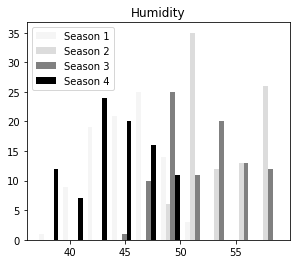

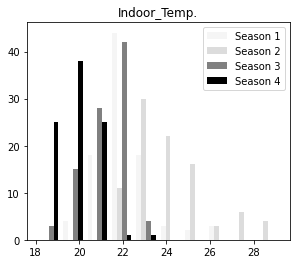

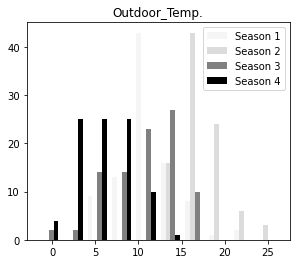

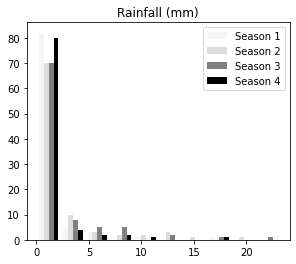

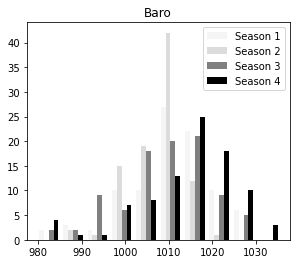

In [18]:
import matplotlib.pyplot as pl
def hist_S(feature):
    fig=pl.figure(figsize=(16,4))
    histo=fig.add_subplot(133)
    pl.hist([S1[feature],S2[feature],S3[feature],S4[feature]],bins = 10, color=['whitesmoke','gainsboro','gray','k'])
    pl.legend(['Season 1','Season 2','Season 3','Season 4'])
    pl.title(feature)
    fig.savefig('_.png', transparent=False,dpi=300, bbox_inches='tight')

hist_S('Humidity')
hist_S('Indoor_Temp.')
hist_S('Outdoor_Temp.')
hist_S('Rainfall (mm)')
hist_S('Baro')

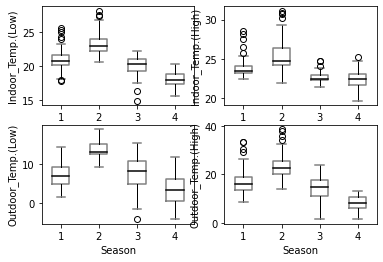

In [19]:
# sub boxplot for season temp (low& high)
def bp_S(feature,i):
    data={'Season 1':S1[feature],'Season 2':S2[feature],'Season 3':S3[feature],'Season 4':S4[feature]}
    bp1,bp2,bp3,bp4=data['Season 1'],data['Season 2'],data['Season 3'],data['Season 4']
    pl.subplot(i)
    labels='1','2','3','4'
    pl.boxplot([bp1,bp2,bp3,bp4],notch=False,labels=labels,patch_artist=False,medianprops={'color':'k','linewidth':'1.5'},boxprops={'color':'gray','linewidth':'1.5'},capprops={'color':'gray','linewidth':'1.5'})
    pl.xlabel('Season',fontsize=10)
    pl.ylabel(feature,fontsize=10)
    pl.xticks(fontsize=10)
    pl.yticks(fontsize=10)
bp_S('Indoor_Temp.(Low)',221)
bp_S('Indoor_Temp.(High)',222)
bp_S('Outdoor_Temp.(Low)',223)
bp_S('Outdoor_Temp.(High)',224)

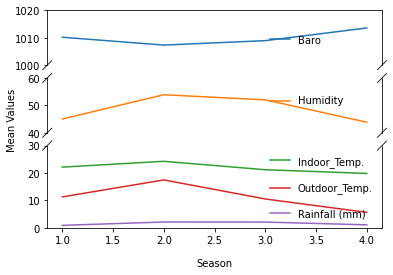

In [20]:
# mean of mean temp. across season
from brokenaxes import brokenaxes as box
S=[1,2,3,4]
mean_S=array([array(S1.mean()),array(S2.mean()),array(S3.mean()),array(S4.mean())]).reshape((4,9))
mean_S_hm=list(mean_S[:,0])
mean_S_it=list(mean_S[:,1])
mean_S_ot=list(mean_S[:,4])
mean_S_bm=list(mean_S[:,7])
mean_S_rf=list(mean_S[:,8])

yaxis=box(ylims=((0,30),(40,60), (1000,1020)), hspace=.2, despine=False)
yaxis.plot(S,mean_S_bm,label='Baro')
yaxis.plot(S,mean_S_hm,label='\n\n\n\nHumidity\n\n\n\n')
yaxis.plot(S,mean_S_it,label='Indoor_Temp.')
yaxis.plot(S,mean_S_ot,label='\nOutdoor_Temp.\n')
yaxis.plot(S,mean_S_rf,label='Rainfall (mm)')
yaxis.set_xlabel('Season')
yaxis.set_ylabel('Mean Values')
yaxis.legend(loc='lower right',labelspacing=0.4,frameon=False)
pl.show()

In [21]:
# percentage of rainy days across months (%)
(S1['Rainfall (mm)']!=0).sum()/len(S1)*100
# 28.26086956521739,46.73913043478261,47.82608695652174,35.55555555555556

28.26086956521739

In [22]:
# total rainfall across seasons (mm)
S4['Rainfall (mm)'].sum()
# 82.5+194.5+191.8+97.7=566.5

97.68275799999999

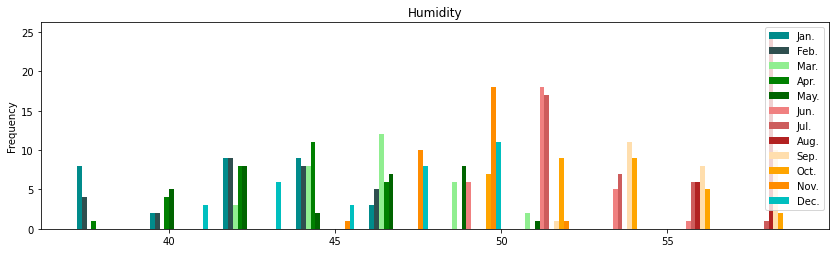

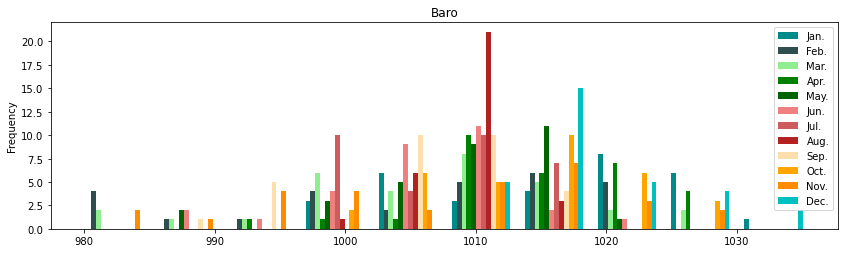

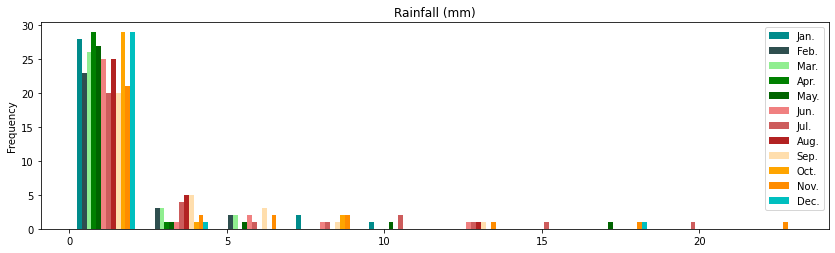

In [23]:
def hist_M(feature):
    fig=pl.figure(figsize=(48,3.8))
    histo=fig.add_subplot(133)
    pl.hist([M_01[feature],M_02[feature],M_03[feature],M_04[feature],M_05[feature],M_06[feature],M_07[feature],M_08[feature],M_09[feature],M_10[feature],M_11[feature],M_12[feature]],bins = 10, color=['darkcyan','darkslategrey','lightgreen','g','darkgreen','lightcoral','indianred','firebrick','navajowhite','orange','darkorange','c'])
    pl.legend(['Jan.','Feb.','Mar.','Apr.','May.','Jun.','Jul.','Aug.','Sep.','Oct.','Nov.','Dec.'])
    pl.title(feature)
    pl.ylabel('Frequency')

hist_M('Humidity')
hist_M('Baro')
hist_M('Rainfall (mm)')

In [24]:
exit()

In [25]:
pip install brokenaxes==0.2

Note: you may need to restart the kernel to use updated packages.


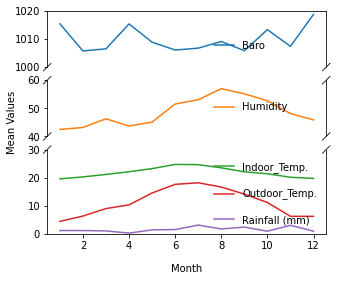

In [26]:
# mean of mean temp. across month
from brokenaxes import brokenaxes as box
M=list(range(1,13))
mean_M=array([array(M_01.mean()),array(M_02.mean()),array(M_03.mean()),array(M_04.mean()),array(M_05.mean()),array(M_06.mean()),array(M_07.mean()),array(M_08.mean()),array(M_09.mean()),array(M_10.mean()),array(M_11.mean()),array(M_12.mean())]).reshape((12,9))
mean_M_hm=list(mean_M[:,0])
mean_M_it=list(mean_M[:,1])
mean_M_ot=list(mean_M[:,4])
mean_M_bm=list(mean_M[:,7])
mean_M_rf=list(mean_M[:,8])
fig=pl.figure(figsize=(5,4.1))
yaxis=box(ylims=((0,30),(40,60), (1000,1020)), hspace=.2, despine=False)
yaxis.plot(M,mean_M_bm,label='Baro')
yaxis.plot(M,mean_M_hm,label='\n\n\n\nHumidity\n\n\n\n')
yaxis.plot(M,mean_M_it,label='Indoor_Temp.')
yaxis.plot(M,mean_M_ot,label='\nOutdoor_Temp.\n')
yaxis.plot(M,mean_M_rf,label='Rainfall (mm)')
yaxis.set_xlabel('Month')
yaxis.set_ylabel('Mean Values')
yaxis.legend(loc='lower right',labelspacing=0.4,frameon=False)
pl.show()
fig.savefig('_.png', transparent=False,dpi=300, bbox_inches='tight')

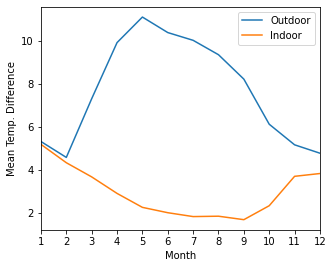

In [27]:
# mean of in& out temp. difference across month
def MeanTempDiff(month):
    itd=(month['Indoor_Temp.(High)']-month['Indoor_Temp.(Low)']).mean()
    otd=(month['Outdoor_Temp.(High)']-month['Outdoor_Temp.(Low)']).mean()
    return [itd,otd]
mitd_01,motd_01=MeanTempDiff(M_01)
mitd_02,motd_02=MeanTempDiff(M_02)
mitd_03,motd_03=MeanTempDiff(M_03)
mitd_04,motd_04=MeanTempDiff(M_04)
mitd_05,motd_05=MeanTempDiff(M_05)
mitd_06,motd_06=MeanTempDiff(M_06)
mitd_07,motd_07=MeanTempDiff(M_07)
mitd_08,motd_08=MeanTempDiff(M_08)
mitd_09,motd_09=MeanTempDiff(M_09)
mitd_10,motd_10=MeanTempDiff(M_10)
mitd_11,motd_11=MeanTempDiff(M_11)
mitd_12,motd_12=MeanTempDiff(M_12)
MITD=[mitd_01,mitd_02,mitd_03,mitd_04,mitd_05,mitd_06,mitd_07,mitd_08,mitd_09,mitd_10,mitd_11,mitd_12]
MOTD=[motd_01,motd_02,motd_03,motd_04,motd_05,motd_06,motd_07,motd_08,motd_09,motd_10,motd_11,motd_12]
fig=pl.figure(figsize=(5,4.1))
pl.plot(M,MOTD,label='Outdoor')
pl.plot(M,MITD,label='Indoor')
pl.xlabel('Month')
pl.ylabel('Mean Temp. Difference')
pl.xticks(range(13))
pl.xlim(1,12)
pl.legend()
pl.show
fig.savefig('_.png', transparent=False,dpi=300, bbox_inches='tight')